In [2]:
# Cell 1: Load the numpy libraries
import numpy as np

# Cell 2: Load data files

# Subdirectory with the module data
path = "C:/Users/darre/OneDrive/Documents/Work/Project/13_09_2021_ColdTests/"

# Define file paths for all VPs
datasets = {
    "VP0": {
        "trim0Mean": path + "Module0_VP0-0_Trim0_Noise_Mean.csv",
        "trimFMean": path + "Module0_VP0-0_TrimF_Noise_Mean.csv",
        "trim0Width": path + "Module0_VP0-0_Trim0_Noise_Width.csv",
        "trimFWidth": path + "Module0_VP0-0_TrimF_Noise_Width.csv",
        "mask": path + "Module0_VP0-0_Matrix_Mask.csv",
        "trim": path + "Module0_VP0-0_Matrix_Trim.csv",
    },
    "VP1": {
        "trim0Mean": path + "Module0_VP1-0_Trim0_Noise_Mean.csv",
        "trimFMean": path + "Module0_VP1-0_TrimF_Noise_Mean.csv",
        "trim0Width": path + "Module0_VP1-0_Trim0_Noise_Width.csv",
        "trimFWidth": path + "Module0_VP1-0_TrimF_Noise_Width.csv",
        "mask": path + "Module0_VP1-0_Matrix_Mask.csv",
        "trim": path + "Module0_VP1-0_Matrix_Trim.csv",
    },
    "VP2": {
        "trim0Mean": path + "Module0_VP2-0_Trim0_Noise_Mean.csv",
        "trimFMean": path + "Module0_VP2-0_TrimF_Noise_Mean.csv",
        "trim0Width": path + "Module0_VP2-0_Trim0_Noise_Width.csv",
        "trimFWidth": path + "Module0_VP2-0_TrimF_Noise_Width.csv",
        "mask": path + "Module0_VP2-0_Matrix_Mask.csv",
        "trim": path + "Module0_VP2-0_Matrix_Trim.csv",
    },
    "VP3": {
        "trim0Mean": path + "Module0_VP3-0_Trim0_Noise_Mean.csv",
        "trimFMean": path + "Module0_VP3-0_TrimF_Noise_Mean.csv",
        "trim0Width": path + "Module0_VP3-0_Trim0_Noise_Width.csv",
        "trimFWidth": path + "Module0_VP3-0_TrimF_Noise_Width.csv",
        "mask": path + "Module0_VP3-0_Matrix_Mask.csv",
        "trim": path + "Module0_VP3-0_Matrix_Trim.csv",
    },
}



# Function to load and reshape data for a given VP
def load_vp_data(files):
    # Load and reshape each dataset
    tMean0 = np.genfromtxt(files["trim0Mean"], delimiter=",").astype(np.float16).reshape(256 * 256)
    tMeanF = np.genfromtxt(files["trimFMean"], delimiter=",").astype(np.float16).reshape(256 * 256)
    tWidth0 = np.genfromtxt(files["trim0Width"], delimiter=",").astype(np.float16).reshape(256 * 256)
    tWidthF = np.genfromtxt(files["trimFWidth"], delimiter=",").astype(np.float16).reshape(256 * 256)
    mask = np.genfromtxt(files["mask"], delimiter=",").astype(np.float16).reshape(256 * 256)
    trim = np.genfromtxt(files["trim"], delimiter=",").reshape(256 * 256).astype(np.int8)
    
    # Combine inputs and outputs
    x = np.column_stack([tMean0, tMeanF, tWidth0, tWidthF, mask])  # Input features
    y = trim  # Labels
    return x, y

# Load data for all VPs
vp_data = {}
for vp, files in datasets.items():
    print(f"Loading data for {vp}...")
    vp_data[vp] = load_vp_data(files)

# Split data
x_vp0, y_vp0 = vp_data["VP0"]  # VP0 for training
x_vp1, y_vp1 = vp_data["VP1"]  # VP1 for evaluation
x_vp2, y_vp2 = vp_data["VP2"]  # VP2 for evaluation
x_vp3, y_vp3 = vp_data["VP3"]  # VP3 for evaluation



# Define file paths
trim0MeanFile = path + "Module0_VP0-0_Trim0_Noise_Mean.csv"
trimFMeanFile = path + "Module0_VP0-0_TrimF_Noise_Mean.csv"
trim0WidthFile = path + "Module0_VP0-0_Trim0_Noise_Width.csv"
trimFWidthFile = path + "Module0_VP0-0_TrimF_Noise_Width.csv"
maskFile = path + "Module0_VP0-0_Matrix_Mask.csv"
trimFile = path + "Module0_VP0-0_Matrix_Trim.csv"

# Cell 3: Read and reshape data from the CSV files

# Read and reshape noise mean data for Trim0 and TrimF
tMean0 = np.genfromtxt(trim0MeanFile, delimiter=",").astype(np.float16).reshape(256 * 256)
tMeanF = np.genfromtxt(trimFMeanFile, delimiter=",").astype(np.float16).reshape(256 * 256)

# Read and reshape noise width data for Trim0 and TrimF
tWidth0 = np.genfromtxt(trim0WidthFile, delimiter=",").astype(np.float16).reshape(256 * 256)
tWidthF = np.genfromtxt(trimFWidthFile, delimiter=",").astype(np.float16).reshape(256 * 256)

# Read and reshape mask and trim data
mask = np.genfromtxt(maskFile, delimiter=",").astype(np.float16).reshape(256 * 256)
trim = np.genfromtxt(trimFile, delimiter=",").reshape(256 * 256).astype(np.int8)



Loading data for VP0...
Loading data for VP1...
Loading data for VP2...
Loading data for VP3...


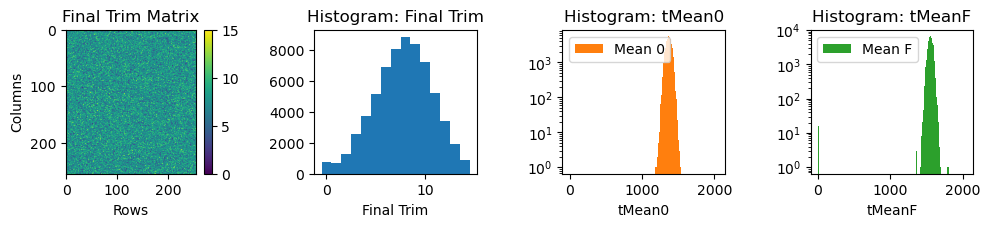

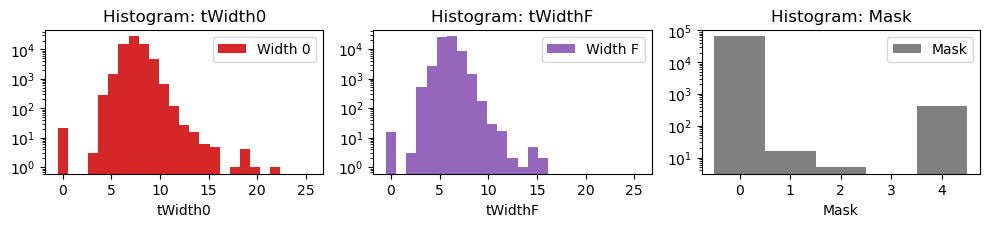

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these arrays are defined in your environment:
# trim, tMean0, tMeanF, tWidth0, tWidthF, mask

# --- Figure 1: Top Row (4 subplots) ---
fig_top, axes_top = plt.subplots(1, 4, figsize=(10, 2.5))

# Subplot 1: Final Trim Values Matrix (as image)
img = axes_top[0].imshow(trim.reshape(256, 256), aspect='auto')
axes_top[0].set_title("Final Trim Matrix")
axes_top[0].set_xlabel("Rows")
axes_top[0].set_ylabel("Columns")
fig_top.colorbar(img, ax=axes_top[0])

# Subplot 2: Histogram of Final Trim
axes_top[1].hist(trim, bins=np.arange(-0.5, 15.5, 1), color='C0') 
axes_top[1].set_title("Histogram: Final Trim")
axes_top[1].set_xlabel("Final Trim")

# Subplot 3: Histogram of tMean0
axes_top[2].hist(tMean0, bins=np.linspace(-0.5, 2047.5, 256), color='C1', label="Mean 0")
axes_top[2].set_yscale('log')
axes_top[2].set_title("Histogram: tMean0")
axes_top[2].set_xlabel("tMean0")
axes_top[2].legend()

# Subplot 4: Histogram of tMeanF
axes_top[3].hist(tMeanF, bins=np.linspace(-0.5, 2047.5, 256), color='C2', label="Mean F")
axes_top[3].set_yscale('log')
axes_top[3].set_title("Histogram: tMeanF")
axes_top[3].set_xlabel("tMeanF")
axes_top[3].legend()

fig_top.tight_layout(rect=[0, 0, 1, 0.95])
fig_top.savefig("top_row.png", dpi=300)
plt.show()

# --- Figure 2: Bottom Row (3 subplots) ---
fig_bottom, axes_bottom = plt.subplots(1, 3, figsize=(10, 2.5))

# Subplot 1: Histogram of tWidth0
axes_bottom[0].hist(tWidth0, bins=np.linspace(-0.5, 25.5, 26), color='C3', label="Width 0")
axes_bottom[0].set_yscale('log')
axes_bottom[0].set_title("Histogram: tWidth0")
axes_bottom[0].set_xlabel("tWidth0")
axes_bottom[0].legend()

# Subplot 2: Histogram of tWidthF
axes_bottom[1].hist(tWidthF, bins=np.linspace(-0.5, 25.5, 26), color='C4', label="Width F")
axes_bottom[1].set_yscale('log')
axes_bottom[1].set_title("Histogram: tWidthF")
axes_bottom[1].set_xlabel("tWidthF")
axes_bottom[1].legend()

# Subplot 3: Histogram of mask
axes_bottom[2].hist(mask, bins=np.arange(-0.5, 5.5, 1), color='gray', label="Mask")
axes_bottom[2].set_yscale('log')
axes_bottom[2].set_title("Histogram: Mask")
axes_bottom[2].set_xlabel("Mask")
axes_bottom[2].legend()

fig_bottom.tight_layout(rect=[0, 0, 1, 0.95])
fig_bottom.savefig("bottom_row.png", dpi=300)
plt.show()


In [4]:
# Estimate trim values from trim0, trimF, and mask using a Neural Network (NN)
# Define x as training data, y as the target output, merging variables into one array
# Input data consists of each value of tMean0, tMeanF, tWidth0, tWidthF, and mask

# Input data (stacked into columns)
x_all = np.column_stack([tMean0, tMeanF, tWidth0, tWidthF, mask])

# Output data (trim values)
y_all = trim

# Get the length of the data and number of variables
dataLen = x_all.shape[0]
nVars = x_all.shape[1]
print(f"dataLen = {dataLen}, nVars = {nVars}")

# Split the data: even indices as training data
x_data = x_all[::2]  # Even-indexed samples for training
y_data = y_all[::2]  # Corresponding trim values for training

# Odd indices as evaluation data
x_eval = x_all[1::2]  # Odd-indexed samples for evaluation
y_eval = y_all[1::2]  # Corresponding trim values for evaluation




dataLen = 65536, nVars = 5


In [6]:
import pandas as pd
# Function to calculate RMS (Root Mean Square) safely
def calculate_rms(array):
    # Convert to higher precision to avoid overflow
    array = array.astype(np.float64)
    return np.sqrt(np.mean(array**2))

# Define the modules (VP0, VP1, VP2, VP3) and their respective input arrays
modules = {
    "VP0": x_vp0.astype(np.float64),  # Convert to higher precision
    "VP1": x_vp1.astype(np.float64),
    "VP2": x_vp2.astype(np.float64),
    "VP3": x_vp3.astype(np.float64),
}

# Features corresponding to the columns in the input arrays
features = ["Trim Mean 0", "Trim Mean F", "Trim Width 0", "Trim Width F", "Mask"]

# Prepare a list to hold the table rows
table_data = []

# Loop through each module and calculate mean and RMS for each input feature
for module, data_array in modules.items():
    # Step 1: Filter rows where the mask column (5th column, index 4) is <= 0
    valid_indices_mask = data_array[:, 4] <= 0
    filtered_data = data_array[valid_indices_mask]
    
    # Step 2: Remove rows with NaN values
    valid_indices_nan = ~np.isnan(filtered_data).any(axis=1)
    filtered_data = filtered_data[valid_indices_nan]
    
    # Calculate mean and RMS for each feature
    for i, feature in enumerate(features):
        column_data = filtered_data[:, i]  # Extract the i-th column (feature)
        mean_value = np.mean(column_data)
        rms_value = calculate_rms(column_data)
        table_data.append([module, feature, mean_value, rms_value])

# Create a DataFrame for the table
columns = ["Module", "Input Feature", "Mean", "RMS"]
table_df = pd.DataFrame(table_data, columns=columns)

# Save the table to a CSV file or display
table_df.to_csv("RMS_and_Mean_Values_Filtered.csv", index=False)
print(table_df)


   Module Input Feature         Mean          RMS
0     VP0   Trim Mean 0  1367.966490  1368.468378
1     VP0   Trim Mean F  1554.114310  1554.411185
2     VP0  Trim Width 0     7.447663     7.515182
3     VP0  Trim Width F     5.969930     6.032484
4     VP0          Mask     0.000000     0.000000
5     VP1   Trim Mean 0  1283.245125  1284.376403
6     VP1   Trim Mean F  1560.125672  1560.458606
7     VP1  Trim Width 0     9.570717     9.712631
8     VP1  Trim Width F     5.506729     5.590126
9     VP1          Mask     0.000000     0.000000
10    VP2   Trim Mean 0  1337.075097  1337.738310
11    VP2   Trim Mean F  1556.249295  1556.578161
12    VP2  Trim Width 0     7.108738     7.155771
13    VP2  Trim Width F     5.152402     5.184339
14    VP2          Mask     0.000000     0.000000
15    VP3   Trim Mean 0  1373.778584  1374.192275
16    VP3   Trim Mean F  1551.636482  1551.931259
17    VP3  Trim Width 0     6.366072     6.401125
18    VP3  Trim Width F     5.557264     5.590944


In [7]:
import keras
from keras.layers import BatchNormalization, Dense, Input, LeakyReLU
from keras.models import Model

# Simple 3-layer Keras network
# For details on Keras, see https://keras.io/

# Define a Functional Keras NN model

# BatchNormalization layer: normalizes input data to a useful range
norm = BatchNormalization()

# Define input layer
nVal = x_data.shape[1]  # Number of input features
inputs = Input(shape=(nVal,))  # Input shape corresponds to the number of features

# Apply normalization
iLayer = norm(inputs)

# Add a Dense layer with ReLU activation (fully connected layer) #experiment with this, adding more layers or neurons.
iLayer = Dense(nVal, activation='relu')(iLayer)
#iLayer = Dense(nVal)(iLayer)
#ilayer = LeakyReLU(alpha=1)(iLayer)
#alpha determines how strongly it creates non zero values instead of reLUs 0 values, if alpha = 0, leaky RelU = RelU

# Add the output layer with 16 nodes and softmax activation (for classification into 16 categories) 
output = Dense(16, activation='softmax')(iLayer)
#experiment changing to 1 and sigmoid or tanh

# Create the model by specifying the inputs and outputs
model = Model(inputs=inputs, outputs=output)

# Compile the model with an optimizer, loss function, and metric
model.compile(optimizer=keras.optimizers.get("Adam"),  # Adam optimizer
              loss=keras.losses.SparseCategoricalCrossentropy(),  # Loss function: Sparse categorical crossentropy
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Metrics to track: accuracy

# Evaluate the model before training to get initial loss and accuracy
score = model.evaluate(x_eval, y_eval, verbose=1)
print('Initial loss: {:7.4f} with the random starting network'.format(score[0]))
print('Initial accuracy: {:7.4f}, expect 1/16 = 0.06 by chance'.format(score[1]))


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 545.2854 - sparse_categorical_accuracy: 0.0552
Initial loss: 546.3834 with the random starting network
Initial accuracy:  0.0561, expect 1/16 = 0.06 by chance


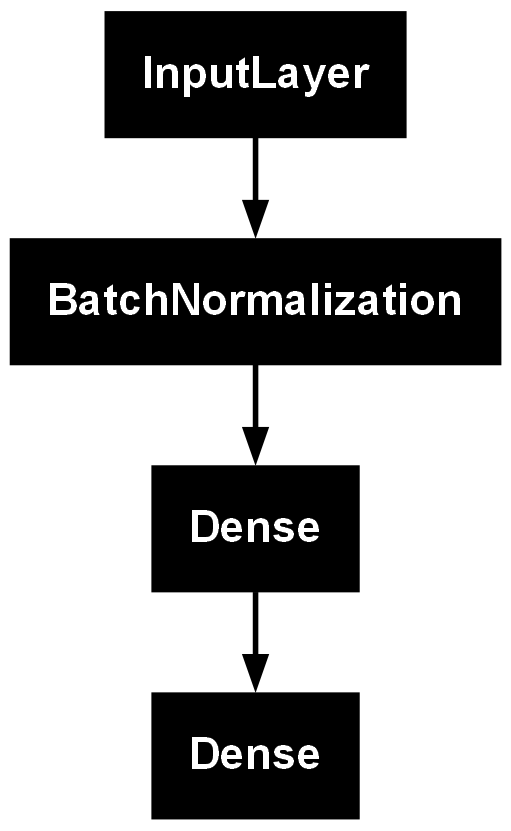

In [8]:
from keras.utils import plot_model

plot_model(model)

In [6]:
# Choose a batch size
batchSize = 256

# Import EarlyStopping callback from Keras
from keras.callbacks import EarlyStopping

# EarlyStopping: stop training early if the loss does not improve after N iterations (patience=5)
early_stopping = EarlyStopping(monitor="loss", patience=25)

# Run the optimization/training process
# Each epoch is one full pass through the training data
history = model.fit(x=x_data, y=y_data,
                    batch_size=batchSize,
                    verbose=1,  # Output progress info
                    epochs=10000,  # Set max number of epochs, will stop earlier if needed
                    shuffle=True,  # Shuffle the training data before each epoch
                    callbacks=[early_stopping])  # Use early stopping to stop training if needed

# Print the number of epochs the model ran before stopping
print("Stopped after ", history.epoch[-1], " epochs")


Epoch 1/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8220 - sparse_categorical_accuracy: 0.1184
Epoch 2/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5447 - sparse_categorical_accuracy: 0.1923
Epoch 3/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3168 - sparse_categorical_accuracy: 0.1959
Epoch 4/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1487 - sparse_categorical_accuracy: 0.2753
Epoch 5/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9878 - sparse_categorical_accuracy: 0.3429
Epoch 6/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8612 - sparse_categorical_accuracy: 0.3930
Epoch 7/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7485 - sparse_categorical_accuracy: 0.4384
Epoch 8/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6187 - sparse_categorical_accuracy: 0.4926
Epoch 9/10000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5019 - sparse_categorical_accuracy: 0.5426
Epoch 10/10000
128/128 ━━━━━

dict_keys(['loss', 'sparse_categorical_accuracy'])


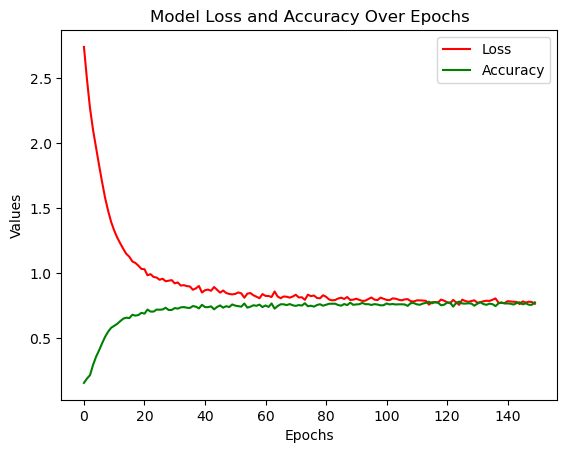

In [7]:
# Assuming history.history has the keys 'loss' and 'sparse_categorical_accuracy'
print(history.history.keys())

# Plot loss and accuracy
plt.plot(history.epoch, history.history['loss'], color='red', label='Loss')
plt.plot(history.epoch, history.history['sparse_categorical_accuracy'], color='green', label='Accuracy')

# Add axis labels
plt.xlabel('Epochs')
plt.ylabel('Values')

# Add a legend
plt.legend()

# Add a title (optional, for clarity)
plt.title('Model Loss and Accuracy Over Epochs')

# Display the plot
plt.show()


In [8]:
# Evaluate the model on the evaluation data
score = model.evaluate(x_eval, y_eval, verbose=1)

# Print the final loss and accuracy
print('Final loss: {:7.4f} with the trained network'.format(score[0]))
print('Final accuracy: {:7.4f}, 1 = perfect'.format(score[1]))

# Predict the output using the trained model
print("Example output:")
pred = model.predict(x_eval)

# Define a function to calculate confidence for each prediction
def confidence(pred):
    """Assuming a one-hot vector, largest value = prediction, confidence = largest/sum."""
    return np.max(pred) / np.sum(pred)

# Display input, true output, best guess from the network, and the confidence of the prediction
print("Input, true output, best guess from network, 'confidence'")
for i in range(10):  # Display results for the first 10 examples
    print(f"{x_eval[i]}, {y_eval[i]}, {np.argmax(pred[i])}, {confidence(pred[i]):.4f}")


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8330 - sparse_categorical_accuracy: 0.5861
Final loss:  0.8574 with the trained network
Final accuracy:  0.5729, 1 = perfect
Example output:
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Input, true output, best guess from network, 'confidence'
[1339.   1560.      7.69    6.4     0.  ], 9, 9, 0.7536
[1430.   1601.      6.88    6.77    0.  ], 3, 4, 0.5901
[1420.   1606.      7.58    5.89    0.  ], 4, 4, 0.4995
[1466.   1649.      7.34    7.45    0.  ], 0, 2, 0.4362
[1336.   1533.      8.91    7.01    0.  ], 10, 10, 0.6045
[1390.   1568.      8.77    6.23    0.  ], 6, 6, 0.4819
[1291.   1518.      8.04    6.29    0.  ], 12, 11, 0.6309
[1365.   1566.      8.35    6.62    0.  ], 8, 8, 0.7885
[1308.   1502.      8.64    6.56    0.  ], 13, 11, 0.4620
[1340.   1524.      7.77    6.87    0.  ], 10, 10, 0.6677


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix


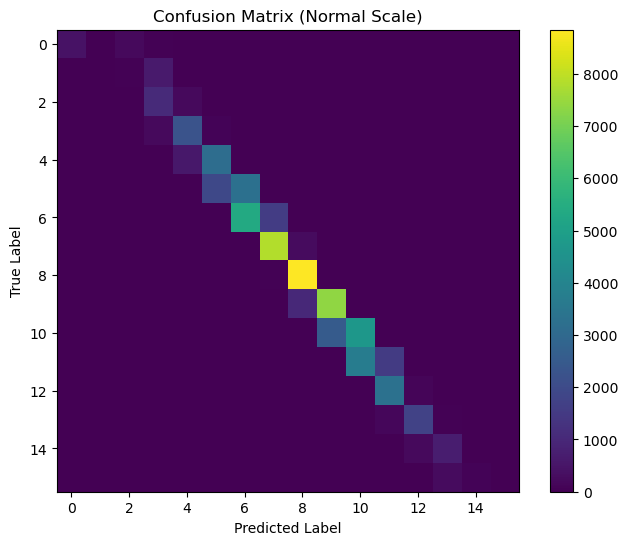

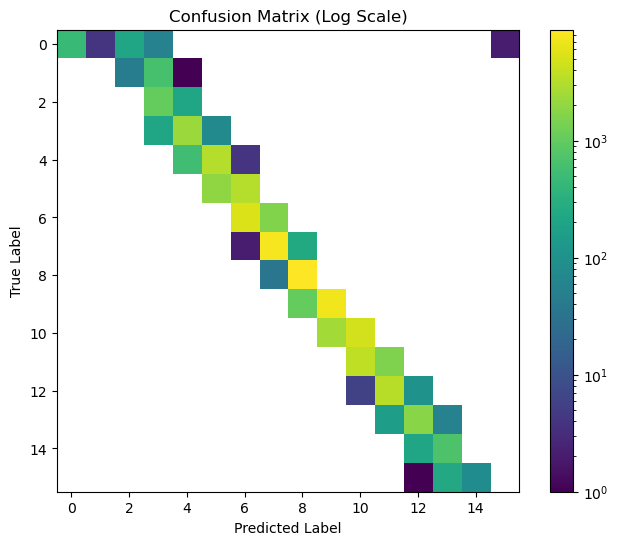

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       728
           1       0.00      0.00      0.00       677
           2       0.00      0.00      0.00      1255
           3       0.11      0.09      0.10      2558
           4       0.18      0.15      0.16      3728
           5       0.37      0.37      0.37      5196
           6       0.62      0.78      0.69      6946
           7       0.83      0.97      0.89      8087
           8       0.87      1.00      0.93      8880
           9       0.74      0.88      0.81      8381
          10       0.56      0.65      0.60      7219
          11       0.31      0.29      0.30      5263
          12       0.05      0.03      0.04      3416
          13       0.06      0.03      0.04      1957
          14       0.00      0.00      0.00       919
          15       0.00      0.00      0.00       326

    accuracy                           0.59     65536
   m

In [9]:
# Predict on the entire dataset
y_pred_all = model.predict(x_all)

# Import necessary functions for confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# Convert predicted probabilities to the predicted class by taking the argmax
y_pred_all_best = np.argmax(y_pred_all, axis=1)

# Print confusion matrix
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_all, y_pred_all_best)

# Plot the confusion matrix with a normal color scale
plt.figure(figsize=(8, 6))
im = plt.imshow(conf_matrix, cmap="viridis")
plt.colorbar(im)
plt.title('Confusion Matrix (Normal Scale)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix with a logarithmic color scale for better clarity in large ranges
plt.figure(figsize=(8, 6))
im = plt.imshow(conf_matrix, cmap="viridis", norm=LogNorm())
plt.colorbar(im)
plt.title('Confusion Matrix (Log Scale)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report, including precision, recall, and F1 score
print('Classification Report')
print(classification_report(y_all, y_pred_all_best))


In [10]:
l = model.get_layer('dense')
l.get_weights()

[array([[-1.4515222 , -2.550624  , -1.1792047 ,  0.4923006 , -2.913036  ],
        [-0.32147   , -1.2731025 , -0.08697844,  1.7650323 , -2.3050666 ],
        [-1.1247045 , -0.48055845, -1.652838  , -2.2660408 , -0.66374606],
        [ 1.283579  ,  0.36492085,  1.5380725 ,  0.5065136 ,  0.196633  ],
        [ 0.596387  ,  2.0797946 ,  0.66419184,  2.3376725 , -0.7511891 ]],
       dtype=float32),
 array([1.2641296 , 0.907705  , 1.7411207 , 1.6911786 , 0.15908313],
       dtype=float32)]

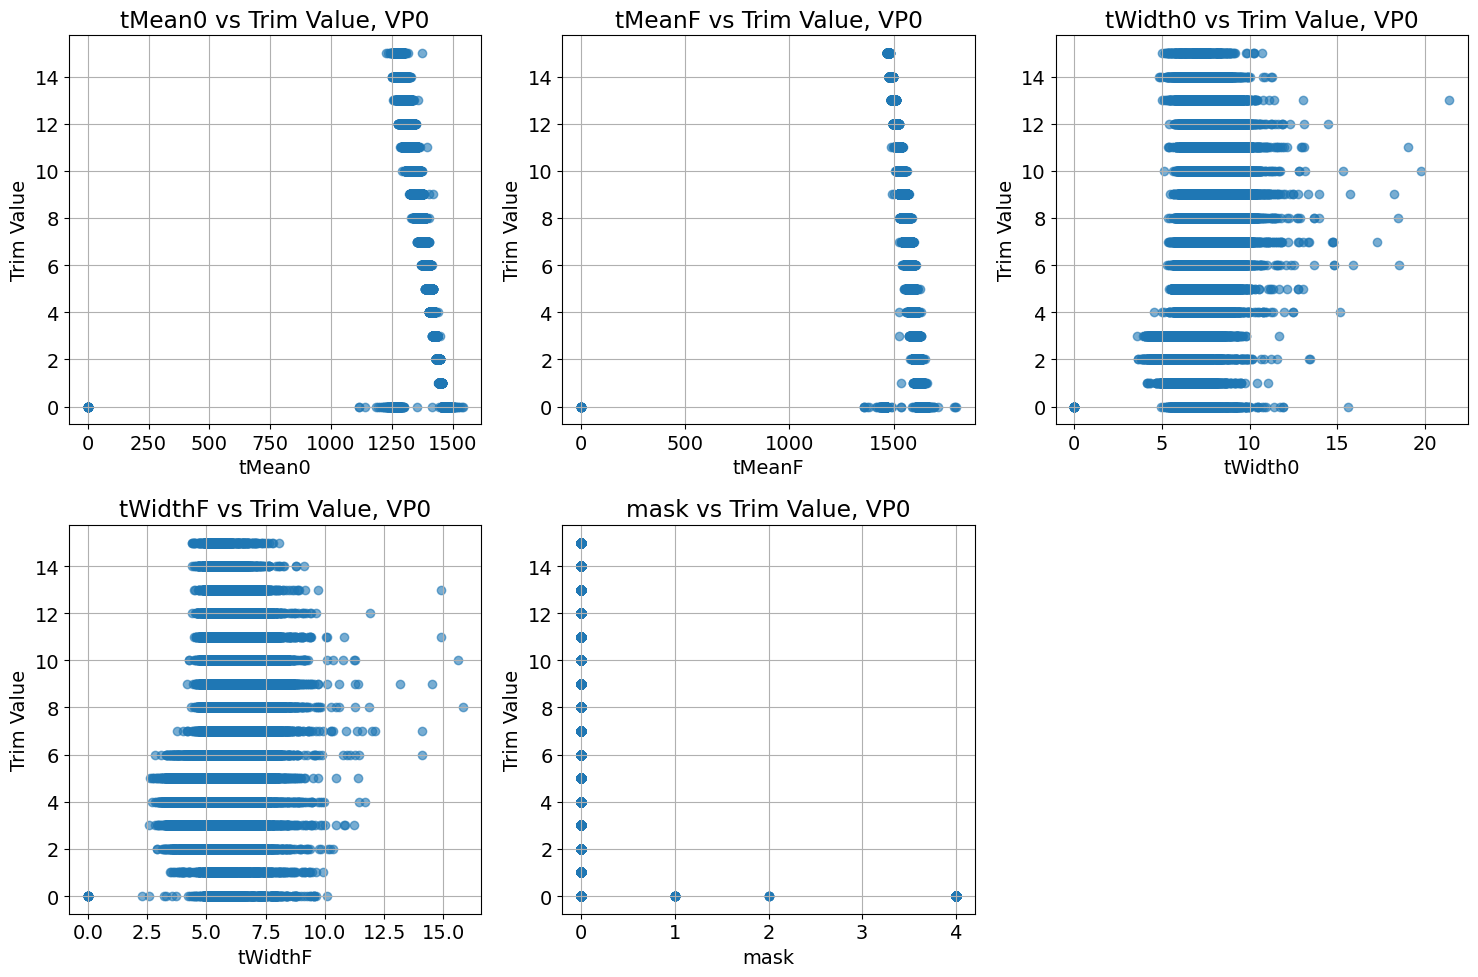

In [30]:
#plot inputs vs outputs to display relationship
#inputs = mask, tWidthF, tWidth0, tMeanF, tMean0
#outputs = trim (real trim values) or pred (predicted value)

inputs = [tMean0, tMeanF, tWidth0, tWidthF, mask]
input_labels = ['tMean0', 'tMeanF', 'tWidth0', 'tWidthF', 'mask']
output = trim  # You can also replace this with 'pred' to show predictions
output_label = 'Trim Value'  # Change to 'Predicted Value' if using 'pred'

plt.figure(figsize=(15, 10))
    
    # Generate a scatter plot for each input feature against the output
for i, input_data in enumerate(inputs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(input_data, output, alpha=0.6)
    plt.title(f"{input_labels[i]} vs {output_label}, VP0")
    plt.xlabel(input_labels[i])
    plt.ylabel(output_label)
    plt.grid(True)
    
plt.tight_layout()
plt.show()

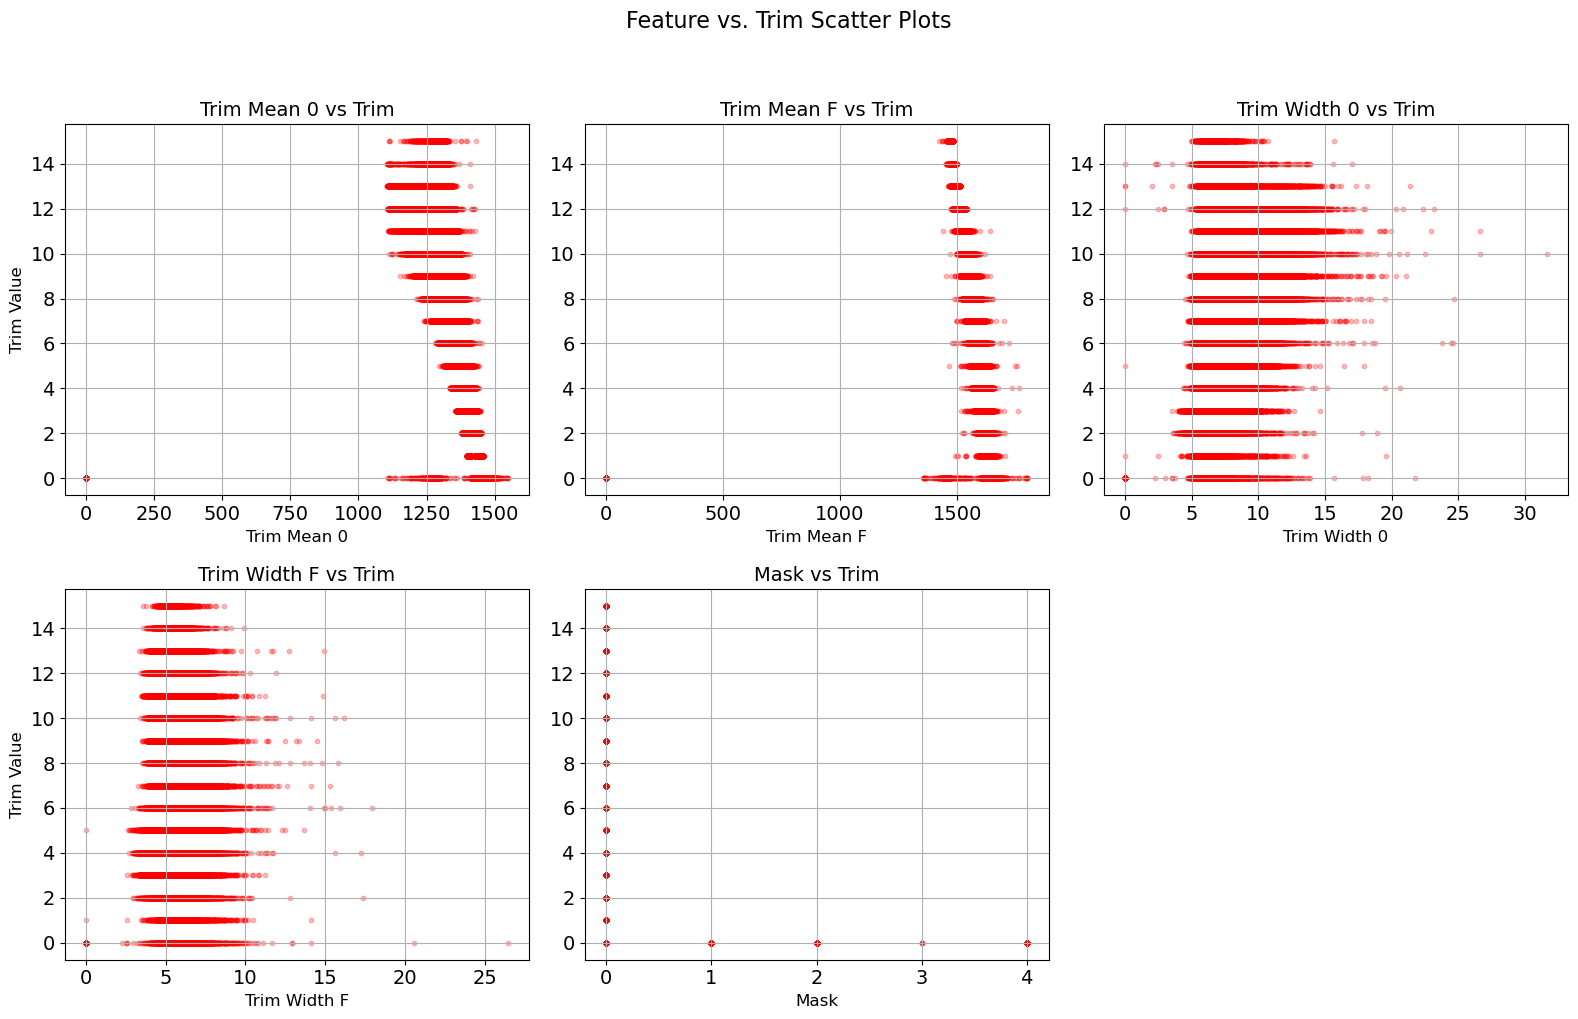

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Concatenate them along axis=0 (the row dimension).
x_combined = np.concatenate([x_vp0, x_vp1, x_vp2, x_vp3], axis=0)

# If you have corresponding trim values for each, do the same for y arrays.
y_combined = np.concatenate([y_vp0, y_vp1, y_vp2, y_vp3], axis=0)


# Example column names
column_names = ["Trim Mean 0", "Trim Mean F", "Trim Width 0", "Trim Width F", "Mask"]

# Suppose x_vp1 is your 2D array of shape (n_samples, 5)

plt.rcParams.update({'font.size': 14})

# Create a figure and a 2x3 grid of subplots (6 total)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()  # Flatten into a 1D array of Axes

for i in range(x_combined.shape[1]):
    ax = axes[i]
    
    # Scatter plot
    ax.scatter(x_combined[:, i], y_combined, s=10, alpha=0.25, c='red')
    ax.set_title(f"{column_names[i]} vs Trim", fontsize=14)
    ax.set_xlabel(column_names[i], fontsize=12)
    
    # Only put y-label on the leftmost column
    if i % 3 == 0:
        ax.set_ylabel("Trim Value", fontsize=12)
    else:
        ax.set_ylabel("")
    
    ax.grid(True)

# If there's an unused subplot (e.g., if you have only 5 columns), remove the extra one(s).
if x_combined.shape[1] < len(axes):
    for j in range(x_combined.shape[1], len(axes)):
        axes[j].remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Feature vs. Trim Scatter Plots", fontsize=16, y=1.02)
plt.show()


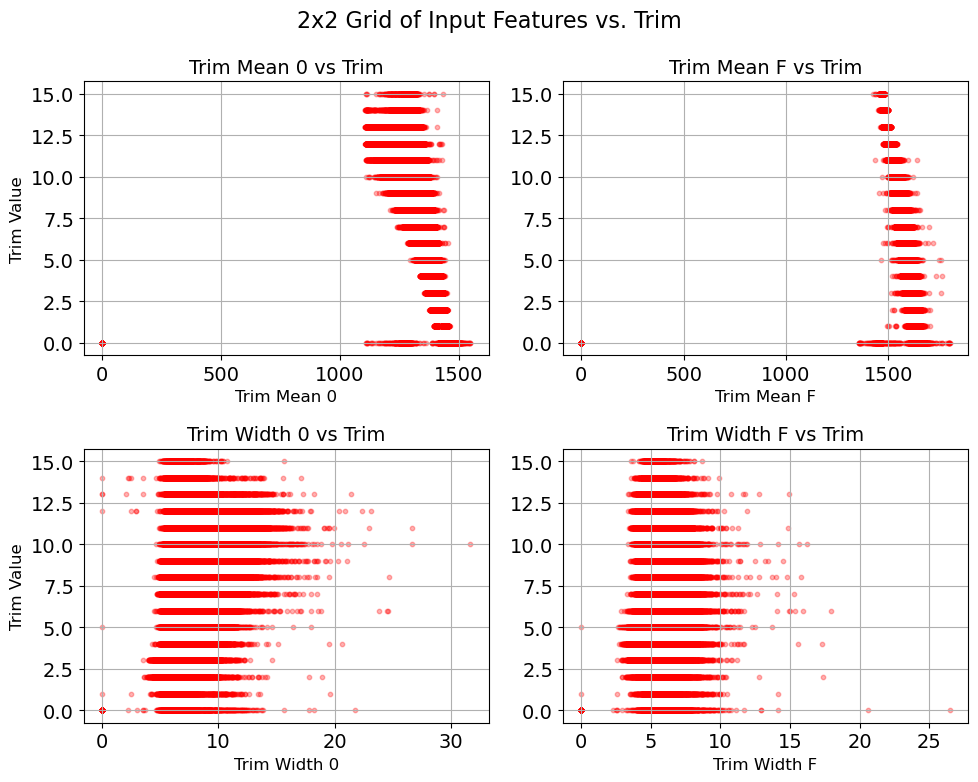

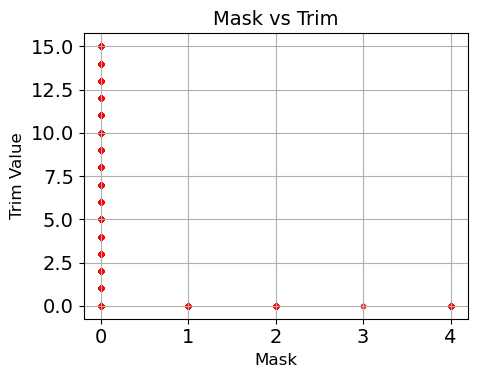

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose x_combined is shape (n_samples, 5) => columns [Mean0, MeanF, Width0, WidthF, Mask]
# Suppose y_combined is shape (n_samples,) => the Trim values
column_names = ["Trim Mean 0", "Trim Mean F", "Trim Width 0", "Trim Width F", "Mask"]

############################################
# Figure 1: 2x2 grid for the first 4 features
############################################
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 8))
axes1 = axes1.flatten()  # Flatten into a 1D array for easy indexing

for i in range(4):  # Only the first 4 features
    ax = axes1[i]
    ax.scatter(x_combined[:, i], y_combined, s=10, alpha=0.3, color='red')
    ax.set_title(f"{column_names[i]} vs Trim", fontsize=14)
    ax.set_xlabel(column_names[i], fontsize=12)
    # Put y-label on left column only
    if i % 2 == 0:
        ax.set_ylabel("Trim Value", fontsize=12)
    else:
        ax.set_ylabel('')
    ax.grid(True)

fig1.suptitle("2x2 Grid of Input Features vs. Trim", fontsize=16)
fig1.tight_layout()
fig1.savefig("four_features_2x2.png")
plt.show()

############################################
# Figure 2: Single plot for Mask (5th feature)
############################################
fig2, ax2 = plt.subplots(figsize=(5, 4))
mask_index = 4  # The index for 'Mask' in x_combined
ax2.scatter(x_combined[:, mask_index], y_combined, s=10, alpha=0.3, color='red')
ax2.set_title(f"{column_names[mask_index]} vs Trim", fontsize=14)
ax2.set_xlabel(column_names[mask_index], fontsize=12)
ax2.set_ylabel("Trim Value", fontsize=12)
ax2.grid(True)

fig2.tight_layout()
fig2.savefig("mask_feature.png")
plt.show()


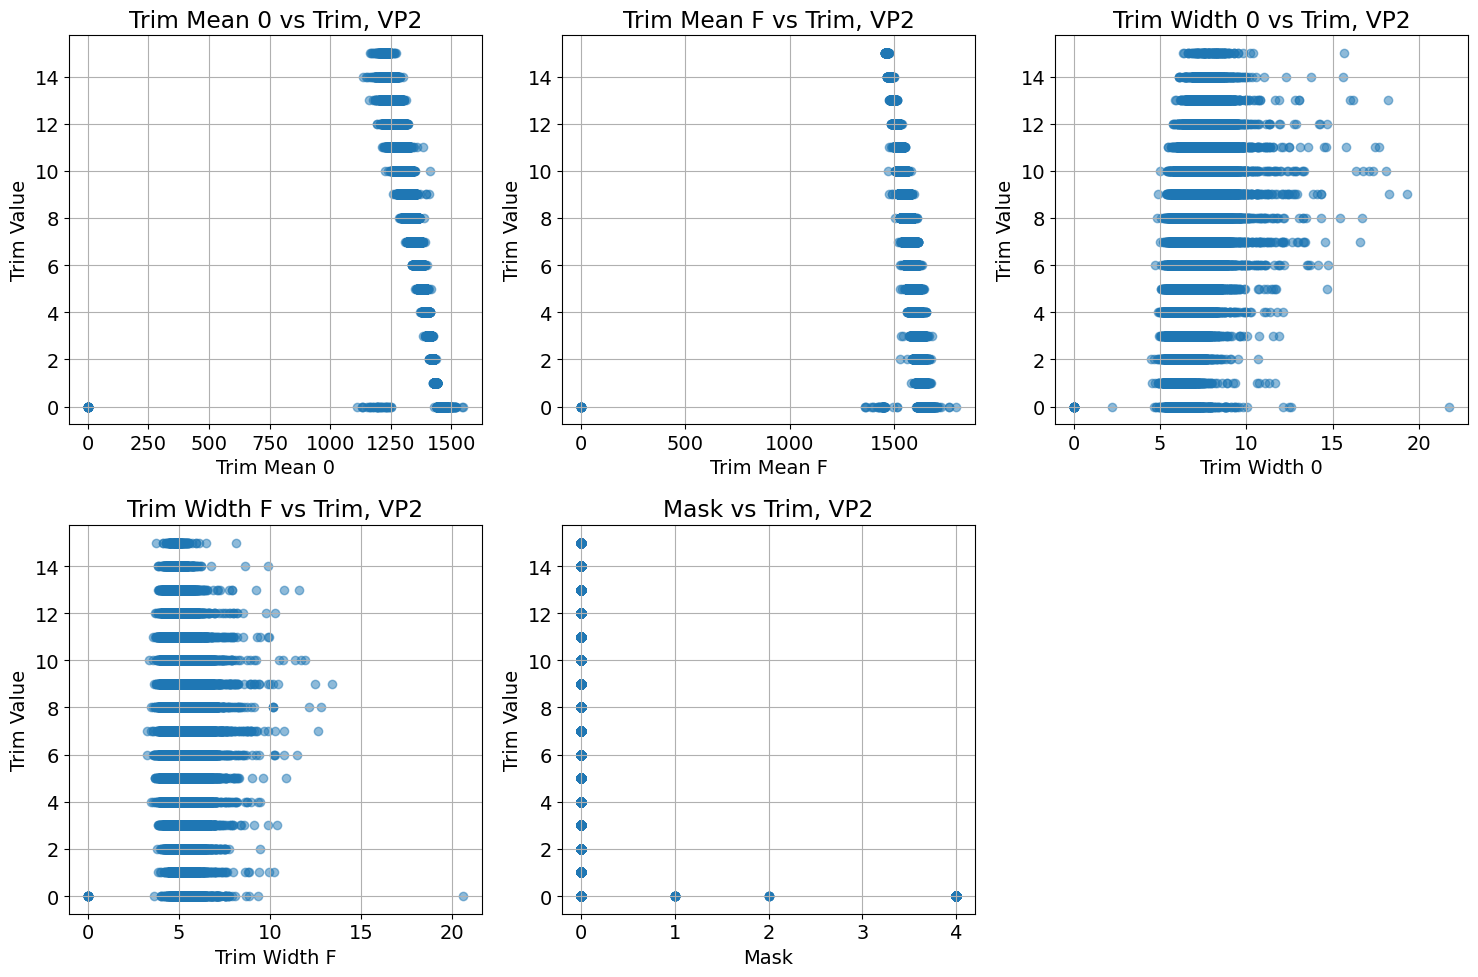

In [32]:
# Create plots
plt.figure(figsize=(15, 10))  # Adjust the figure size for better visualization

for i in range(x_vp2.shape[1]): # Loop through each column in x_vp1
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    plt.scatter(x_vp2[:, i], y_vp2, alpha=0.5)  # Scatter plot of feature vs. target
    plt.title(f"{column_names[i]} vs Trim, VP2")
    plt.xlabel(column_names[i])
    plt.ylabel("Trim Value")
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

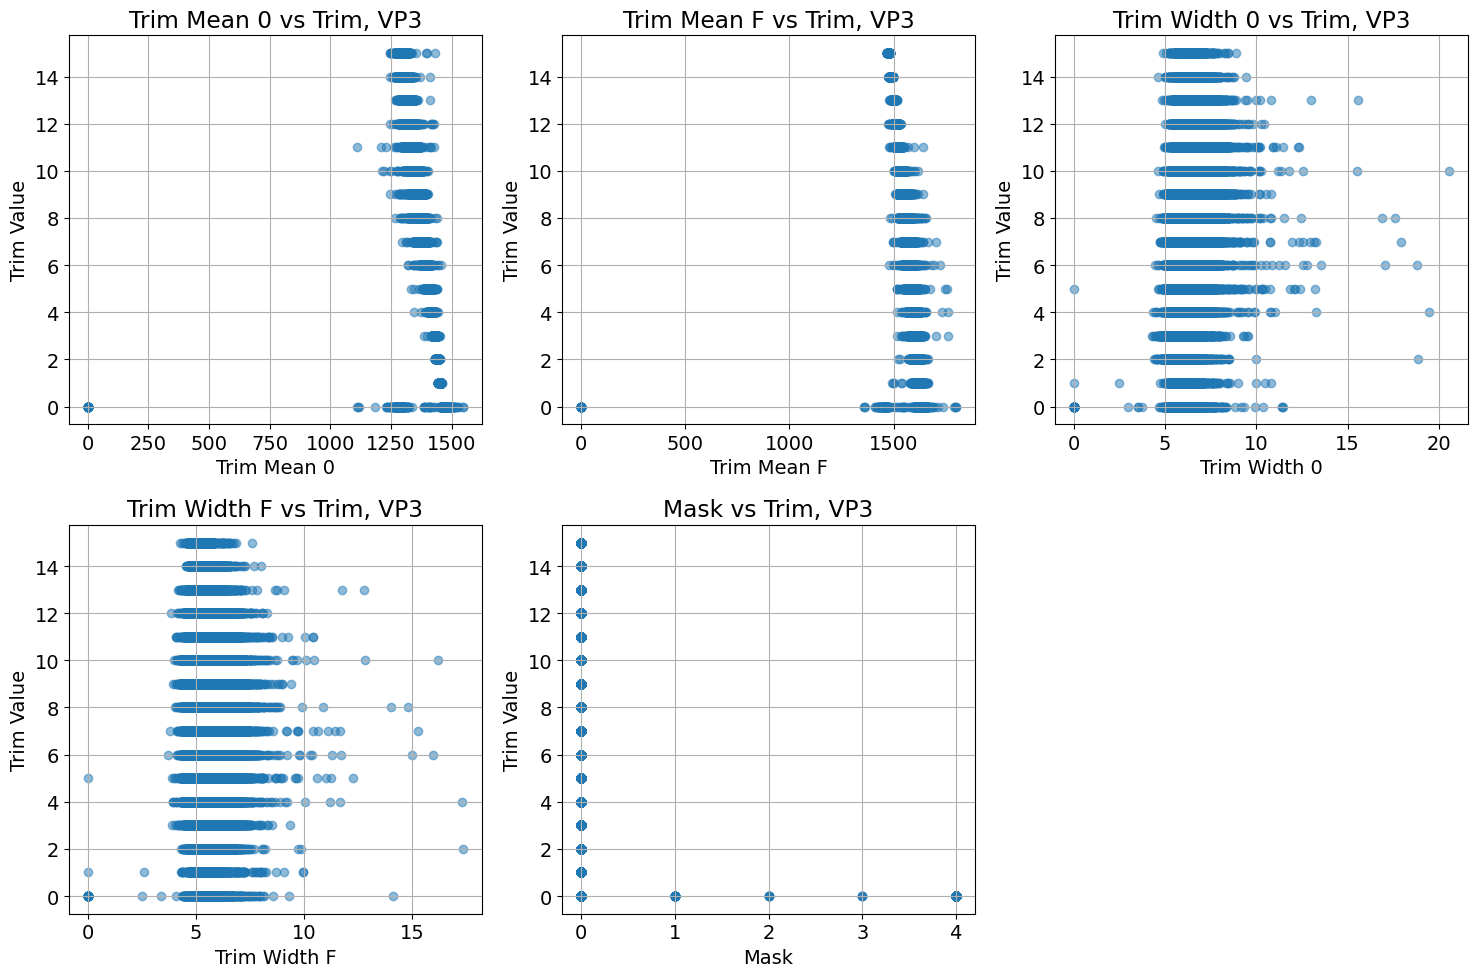

In [33]:
# Create plots
plt.figure(figsize=(15, 10))  # Adjust the figure size for better visualization

for i in range(x_vp3.shape[1]): # Loop through each column in x_vp1
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    plt.scatter(x_vp3[:, i], y_vp3, alpha=0.5)  # Scatter plot of feature vs. target
    plt.title(f"{column_names[i]} vs Trim, VP3")
    plt.xlabel(column_names[i])
    plt.ylabel("Trim Value")
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()